In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [3]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [79]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

# X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
# X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
# X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)
X_train_reshaped_lstm = X_train_lstm.reshape(
    X_train_lstm.shape[0], X_train_lstm.shape[1])
X_val_reshaped_lstm = X_val_lstm.reshape(
    X_val_lstm.shape[0], X_val_lstm.shape[1])
X_test_reshaped_lstm = X_test_lstm.reshape(
    X_test_lstm.shape[0], X_test_lstm.shape[1])

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [103]:
lstm_model = Sequential()
lstm_model.add(LSTM(1, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dense(1, activation='relu'))
lstm_model.add(Dropout(0.5))


In [104]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 1.4387 - accuracy: 0.8385 - val_loss: 0.5187 - val_accuracy: 0.9195
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.8485 - accuracy: 0.8985 - val_loss: 0.5545 - val_accuracy: 0.9490
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.7563 - accuracy: 0.9267 - val_loss: 0.5699 - val_accuracy: 0.9520
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.7259 - accuracy: 0.9383 - val_loss: 0.5819 - val_accuracy: 0.9535
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.7250 - accuracy: 0.9433 - val_loss: 0.5955 - val_accuracy: 0.9540
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.7171 - accuracy: 0.9443 - val_loss: 0.5873 - val_accuracy: 0.9540
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.7270 - accuracy: 0.9457 - val_loss: 0.5869 - val_accuracy: 0.9545

In [96]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 6ms/step - loss: 0.4665 - accuracy: 0.9692 - val_loss: 0.1817 - val_accuracy: 0.9750
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4792 - accuracy: 0.9680 - val_loss: 0.1825 - val_accuracy: 0.9760
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4837 - accuracy: 0.9653 - val_loss: 0.1819 - val_accuracy: 0.9705
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4855 - accuracy: 0.9670 - val_loss: 0.1953 - val_accuracy: 0.9860
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4771 - accuracy: 0.9697 - val_loss: 0.1836 - val_accuracy: 0.9775
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4754 - accuracy: 0.9693 - val_loss: 0.1835 - val_accuracy: 0.9775
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4710 - accuracy: 0.9695 - val_loss: 0.1834 - val_accuracy: 0.9780

In [97]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 0.4609 - accuracy: 0.9638 - val_loss: 0.1765 - val_accuracy: 0.9560
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4814 - accuracy: 0.9627 - val_loss: 0.1766 - val_accuracy: 0.9565
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4763 - accuracy: 0.9637 - val_loss: 0.1766 - val_accuracy: 0.9570
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4730 - accuracy: 0.9618 - val_loss: 0.1766 - val_accuracy: 0.9570
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4878 - accuracy: 0.9652 - val_loss: 0.1766 - val_accuracy: 0.9570
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4666 - accuracy: 0.9648 - val_loss: 0.1767 - val_accuracy: 0.9565
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4781 - accuracy: 0.9650 - val_loss: 0.1767 - val_accuracy: 0.9565

In [98]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.4664 - accuracy: 0.9617 - val_loss: 0.1764 - val_accuracy: 0.9565
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4824 - accuracy: 0.9620 - val_loss: 0.1764 - val_accuracy: 0.9565
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4978 - accuracy: 0.9658 - val_loss: 0.1765 - val_accuracy: 0.9560
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4566 - accuracy: 0.9628 - val_loss: 0.1766 - val_accuracy: 0.9555
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4689 - accuracy: 0.9608 - val_loss: 0.1765 - val_accuracy: 0.9555
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4662 - accuracy: 0.9630 - val_loss: 0.1766 - val_accuracy: 0.9560
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4600 - accuracy: 0.9640 - val_loss: 0.1764 - val_accuracy: 0.9565

In [99]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 8ms/step - loss: 0.4734 - accuracy: 0.9643 - val_loss: 0.1790 - val_accuracy: 0.9595
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4617 - accuracy: 0.9630 - val_loss: 0.1778 - val_accuracy: 0.9590
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4806 - accuracy: 0.9665 - val_loss: 0.1797 - val_accuracy: 0.9605
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4708 - accuracy: 0.9662 - val_loss: 0.1778 - val_accuracy: 0.9605
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4848 - accuracy: 0.9638 - val_loss: 0.1771 - val_accuracy: 0.9590
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4740 - accuracy: 0.9643 - val_loss: 0.1772 - val_accuracy: 0.9615
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.9630 - val_loss: 0.1777 - val_accuracy: 0.9595

In [100]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.9495
Test LSTM Loss:  0.1950787901878357
Test LSTM Accuracy:  0.9495000243186951


In [101]:
lstm_train_probs = lstm_model.predict(X_train_reshaped_lstm, verbose=0)
lstm_train_classes = (lstm_train_probs > 0.5).astype("int32")

lstm_train_probs = lstm_train_probs[:, 0]
lstm_train_classes = lstm_train_classes[:, 0]

lstm_train_accuracy = accuracy_score(y_train_lstm, lstm_train_classes)
print("Accuracy: ", lstm_train_accuracy)

lstm_train_precision = precision_score(y_train_lstm, lstm_train_classes)
print("Precision: ", lstm_train_precision)

lstm_train_recall = recall_score(y_train_lstm, lstm_train_classes)
print("Recall: ", lstm_train_recall)

train_f1_score_value_lstm = f1_score(y_train_lstm, lstm_train_classes)
print("F1 score: ", train_f1_score_value_lstm)


Accuracy:  0.9998333333333334
Precision:  1.0
Recall:  0.9966101694915255
F1 score:  0.99830220713073


In [102]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_probs > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test_lstm, lstm_classes)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


In [16]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


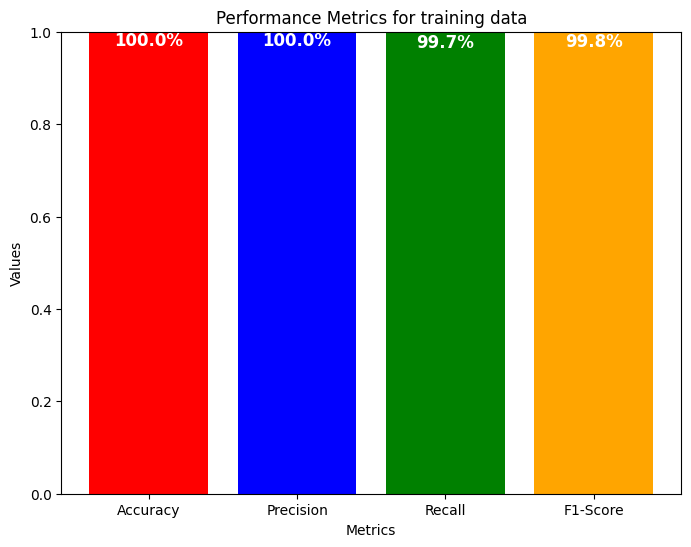

In [78]:
lstm_train_values = [lstm_train_accuracy, lstm_train_precision,
                     lstm_train_recall, train_f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_train_matrix_bars = plt.bar(metrics, lstm_train_values, color=['red',
                                                                    'blue', 'green', 'orange'])
for bar in lstm_train_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training data')
plt.ylim([0, 1])
plt.show()


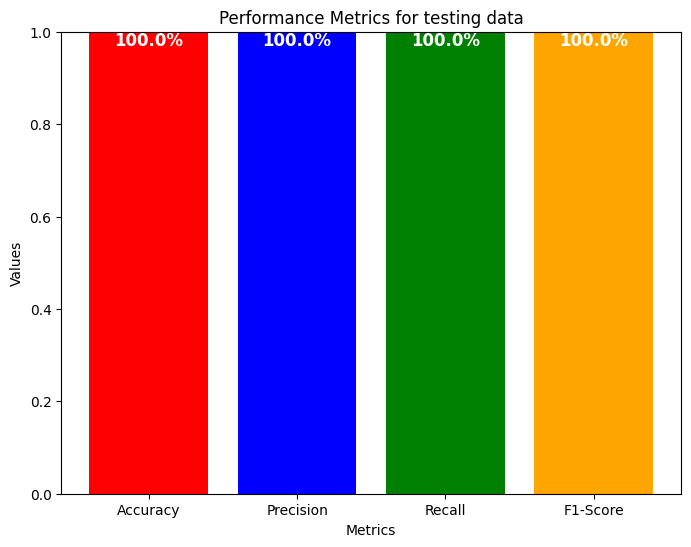

In [18]:
lstm_values = [lstm_accuracy, lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=['red',
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for testing data')
plt.ylim([0, 1])
plt.show()


In [124]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.25, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [125]:
gru_model = Sequential()
gru_model.add(GRU(32, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dense(1, activation='relu'))
gru_model.add(Dropout(0.5))


In [126]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5605 - accuracy: 0.9697 - val_loss: 0.0981 - val_accuracy: 0.9973
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.9760 - val_loss: 0.0585 - val_accuracy: 0.9993
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.9784 - val_loss: 0.0351 - val_accuracy: 0.9993
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.9770 - val_loss: 0.0282 - val_accuracy: 0.9987
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.9760 - val_loss: 0.0212 - val_accuracy: 0.9993
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.9764 - val_loss: 0.0216 - val_accuracy: 0.9993
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.9765 - val_loss: 0.0183 - val_accuracy: 0.9993

In [127]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.3709 - accuracy: 0.9760 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.9765 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.9760 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.9749 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.9771 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.9769 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.9759 - val_loss: 0.0025 - val_accuracy: 0.9993

In [128]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.3785 - accuracy: 0.9754 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.9764 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.9743 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.9743 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.9750 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.9762 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.9745 - val_loss: 0.0023 - val_accuracy: 0.9993

In [129]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.3551 - accuracy: 0.9770 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.9766 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.9768 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.9734 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.9761 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.9761 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.9761 - val_loss: 0.0021 - val_accuracy: 1.0000

In [130]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.3447 - accuracy: 0.9775 - val_loss: 0.0073 - val_accuracy: 0.9993
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.9743 - val_loss: 0.0095 - val_accuracy: 0.9980
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.9766 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3617 - accuracy: 0.9766 - val_loss: 0.0093 - val_accuracy: 0.9987
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.9770 - val_loss: 0.0235 - val_accuracy: 0.9933
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3694 - accuracy: 0.9761 - val_loss: 0.0297 - val_accuracy: 0.9840
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.9750 - val_loss: 0.0098 - val_accuracy: 0.9993

In [131]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


16/16 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9980
Test GRU Loss:  0.008085185661911964
Test GRU Accuracy:  0.9980000257492065


In [132]:
gru_train_probs = gru_model.predict(X_train_reshaped_gru, verbose=0)
gru_train_classes = (gru_train_probs > 0.5).astype("int32")

# gru_train_probs = gru_train_probs[:, 0]
# gru_train_classes = gru_train_classes[:, 0]

gru_train_accuracy = accuracy_score(y_train_gru, gru_train_classes)
print("Accuracy: ", gru_train_accuracy)

gru_train_precision = precision_score(y_train_gru, gru_train_classes)
print("Precision: ", gru_train_precision)

gru_train_recall = recall_score(y_train_gru, gru_train_classes)
print("Recall: ", gru_train_recall)

train_f1_score_value_gru = f1_score(y_train_gru, gru_train_classes)
print("F1 score: ", train_f1_score_value_gru)


Accuracy:  0.998875
Precision:  1.0
Recall:  0.9766839378238342
F1 score:  0.9882044560943645


In [133]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_model.predict(
    X_test_reshaped_gru, verbose=0) > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test_gru, gru_classes)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.998
Precision:  1.0
Recall:  0.96
F1 score:  0.9795918367346939


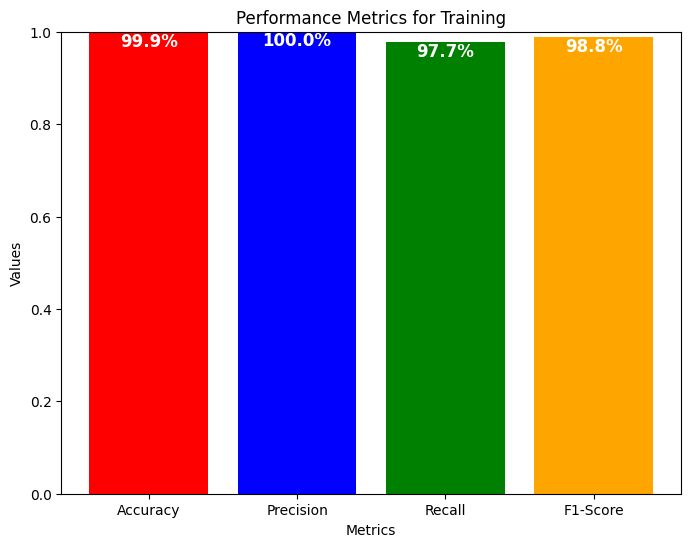

In [134]:
gru_values = [gru_train_accuracy, gru_train_precision,
              gru_train_recall, train_f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Training')
plt.ylim(0, 1)
plt.show()


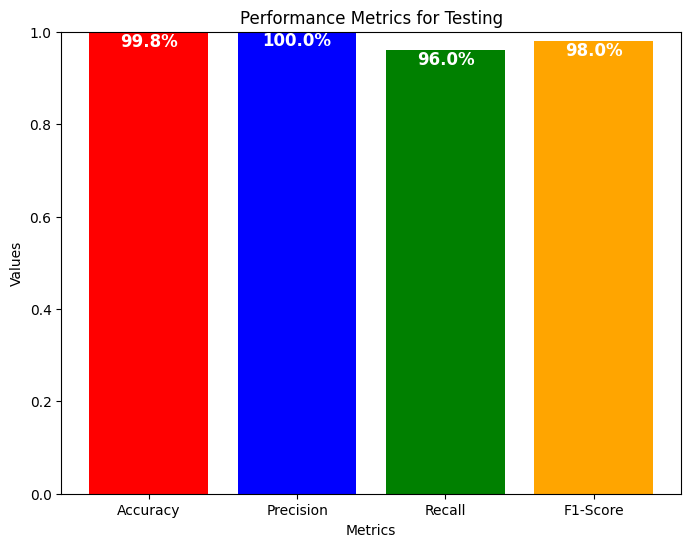

In [135]:
gru_values = [gru_accuracy, gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Testing')
plt.ylim(0, 1)
plt.show()


In [31]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [32]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=16, kernel_size=3, input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=16, kernel_size=3))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(16, activation="relu"))

cnn_model.add(Dropout(0.5))


In [33]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5823 - accuracy: 0.3816 - val_loss: 0.2384 - val_accuracy: 0.4213
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.6901 - val_loss: 0.1179 - val_accuracy: 0.7320
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8241 - val_loss: 0.1067 - val_accuracy: 0.8127
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8834 - val_loss: 0.1046 - val_accuracy: 0.8747
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.9064 - val_loss: 0.1007 - val_accuracy: 0.8793
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.9179 - val_loss: 0.1011 - val_accuracy: 0.9180
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.9299 - val_loss: 0.0993 - val_accuracy: 0.9227

In [34]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.9503 - val_loss: 0.0026 - val_accuracy: 0.9527
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.9509 - val_loss: 0.0036 - val_accuracy: 0.9580
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.9524 - val_loss: 0.0023 - val_accuracy: 0.9560
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.9507 - val_loss: 0.0038 - val_accuracy: 0.9567
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.9501 - val_loss: 0.0017 - val_accuracy: 0.9553
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.9510 - val_loss: 0.0033 - val_accuracy: 0.9567
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3867 - accuracy: 0.9533 - val_loss: 0.0050 - val_accuracy: 0.9593

In [35]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3810 - accuracy: 0.9500 - val_loss: 0.0010 - val_accuracy: 0.9567
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.9499 - val_loss: 9.3801e-04 - val_accuracy: 0.9567
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.9500 - val_loss: 9.9504e-04 - val_accuracy: 0.9567
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.9499 - val_loss: 0.0010 - val_accuracy: 0.9567
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.9501 - val_loss: 9.3235e-04 - val_accuracy: 0.9567
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.9500 - val_loss: 9.0655e-04 - val_accuracy: 0.9567
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.9500 - val_loss: 9.0238e-04 - 

In [36]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.9500 - val_loss: 0.0015 - val_accuracy: 0.9560
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.9500 - val_loss: 0.0015 - val_accuracy: 0.9560
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.9499 - val_loss: 0.0016 - val_accuracy: 0.9560
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.9499 - val_loss: 0.0016 - val_accuracy: 0.9560
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.9503 - val_loss: 0.0016 - val_accuracy: 0.9560
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.9504 - val_loss: 0.0016 - val_accuracy: 0.9560
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.9499 - val_loss: 0.0016 - val_accuracy: 0.9560

In [37]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.9499 - val_loss: 0.0020 - val_accuracy: 0.9553
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.9490 - val_loss: 0.0041 - val_accuracy: 0.9553
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.9499 - val_loss: 0.0042 - val_accuracy: 0.9560
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.9494 - val_loss: 0.0017 - val_accuracy: 0.9573
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.9510 - val_loss: 0.0063 - val_accuracy: 0.9553
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.9487 - val_loss: 0.0039 - val_accuracy: 0.9547
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.9493 - val_loss: 0.0075 - val_accuracy: 0.9573

In [38]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 823us/step - loss: 0.0088 - accuracy: 0.9593
Test CNN Loss:  0.00876100454479456
Test CNN Accuracy:  0.9593333601951599


In [39]:
cnn_train_probs = cnn_model.predict(X_train_reshaped_cnn, verbose=0)
cnn_train_classes = (cnn_train_probs > 0.5).astype("int32")

cnn_train_probs = cnn_train_probs[:, 0]
cnn_train_classes = cnn_train_classes[:, 0]

cnn_train_accuracy = accuracy_score(y_train_cnn, cnn_train_classes)
print("Accuracy: ", cnn_train_accuracy)

cnn_train_precision = precision_score(y_train_cnn, cnn_train_classes)
print("Precision: ", cnn_train_precision)

cnn_train_recall = recall_score(y_train_cnn, cnn_train_classes)
print("Recall: ", cnn_train_recall)

train_f1_score_value_cnn = f1_score(y_train_cnn, cnn_train_classes)
print("F1 score: ", train_f1_score_value_cnn)


Accuracy:  0.997
Precision:  1.0
Recall:  0.9401709401709402
F1 score:  0.9691629955947136


In [40]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_probs > 0.5).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test_cnn, cnn_classes)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.9966666666666667
Precision:  1.0
Recall:  0.9285714285714286
F1 score:  0.962962962962963


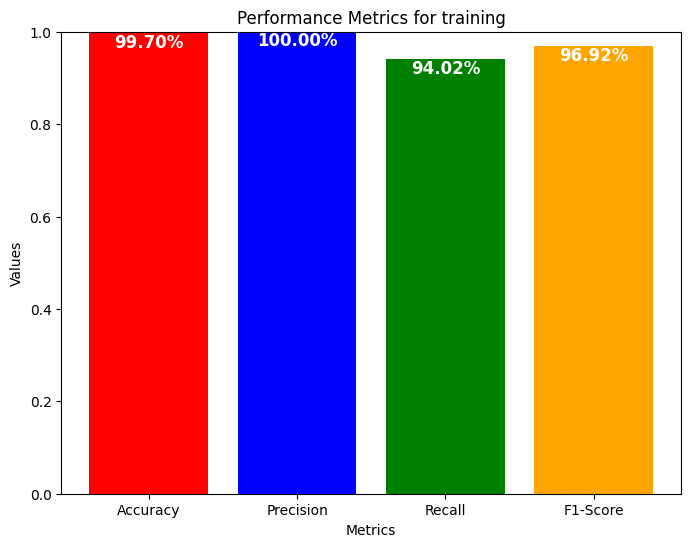

In [41]:
cnn_values = [cnn_train_accuracy, cnn_train_precision,
              cnn_train_recall, train_f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training')
plt.ylim(0, 1)
plt.show()


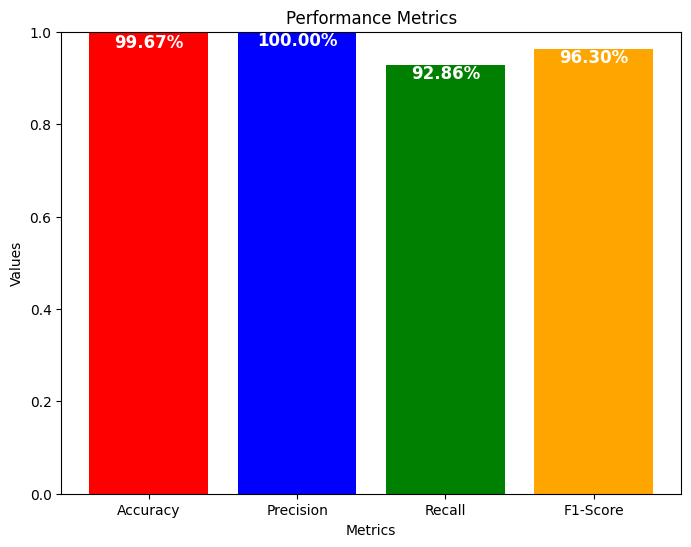

In [42]:
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


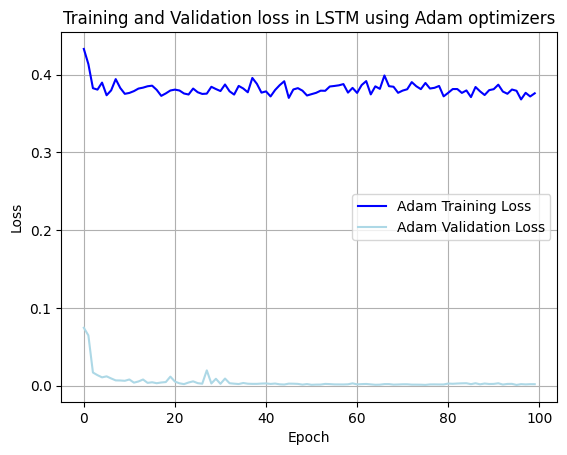

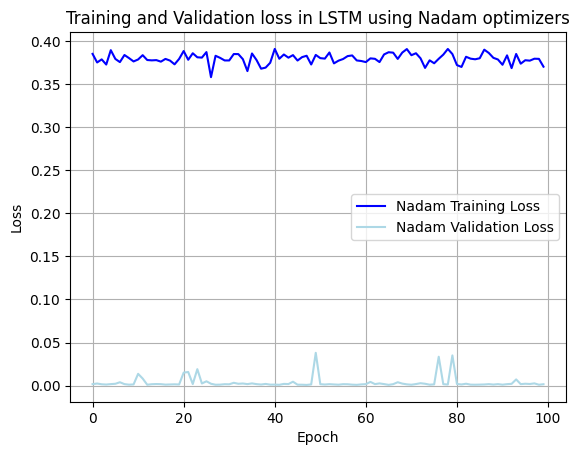

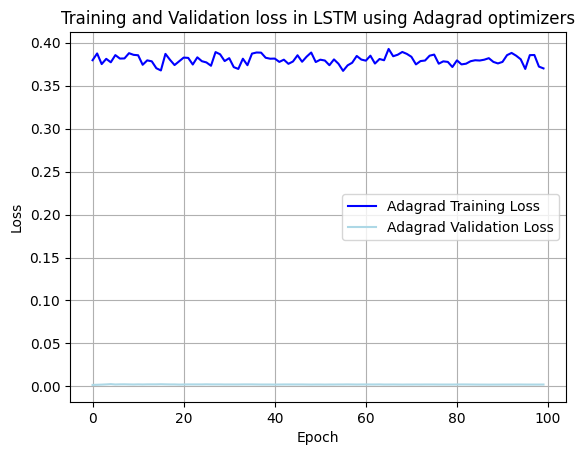

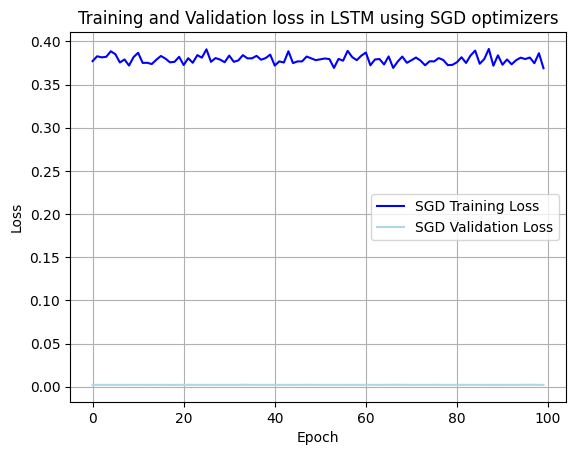

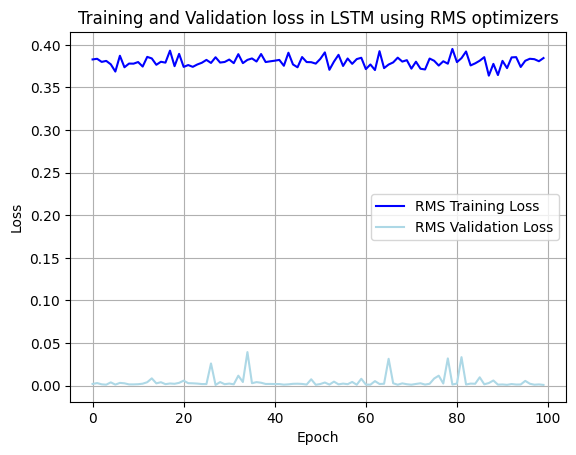

In [43]:
# ----- LSTM Adam Loss -----
plt.plot(lstm_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(lstm_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Loss -----
plt.plot(lstm_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(lstm_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Loss -----
plt.plot(lstm_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(lstm_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Loss -----
plt.plot(lstm_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(lstm_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Loss -----
plt.plot(lstm_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(lstm_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


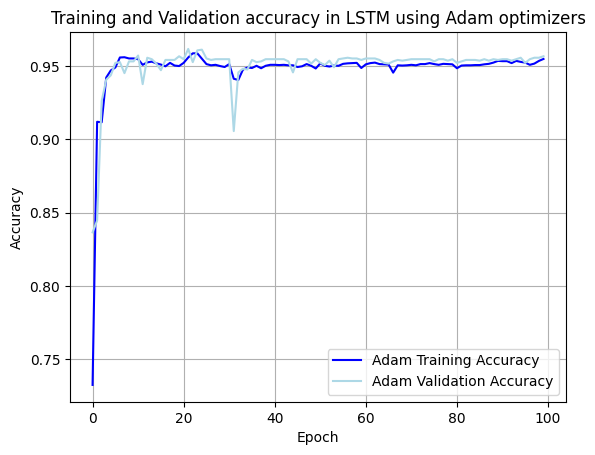

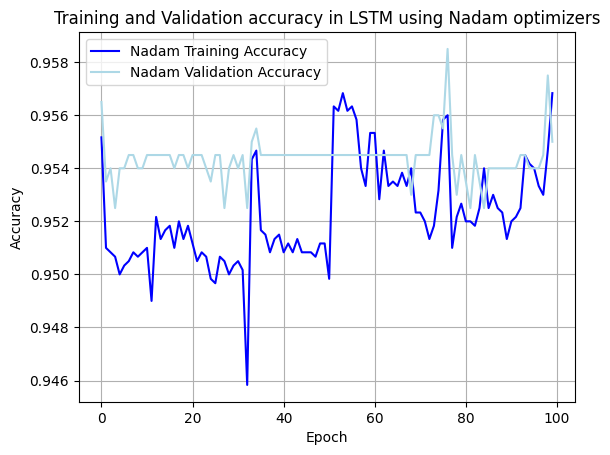

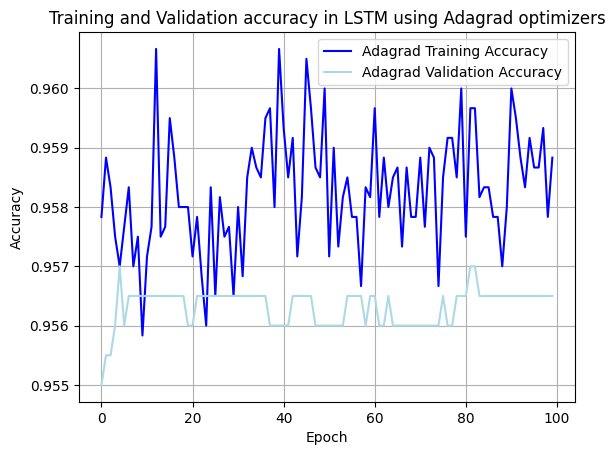

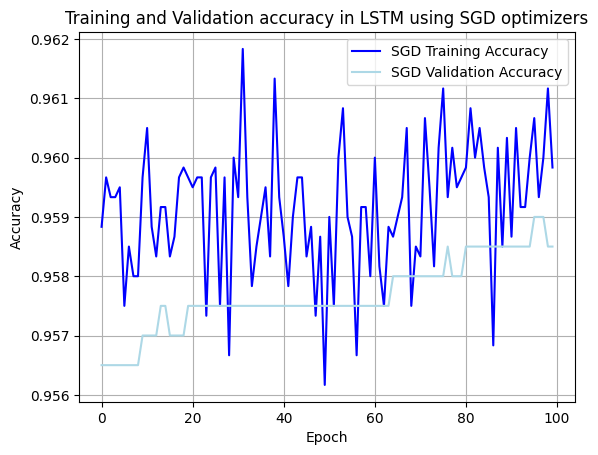

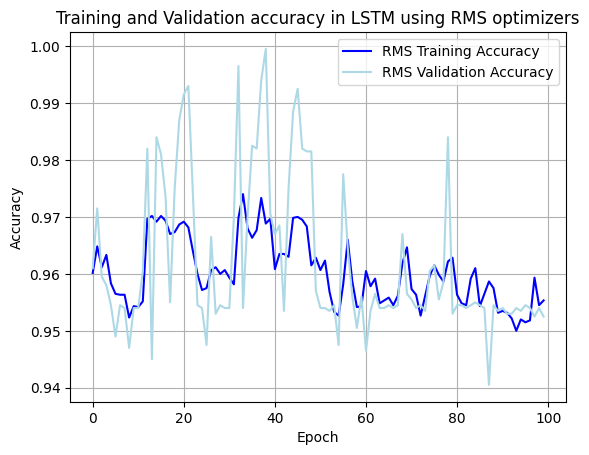

In [44]:
# ----- LSTM Adam Accuracy -----
plt.plot(lstm_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(lstm_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Accuracy -----
plt.plot(lstm_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(lstm_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Accuracy -----
plt.plot(lstm_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(lstm_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Accuracy -----
plt.plot(lstm_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(lstm_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Accuracy -----
plt.plot(lstm_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(lstm_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


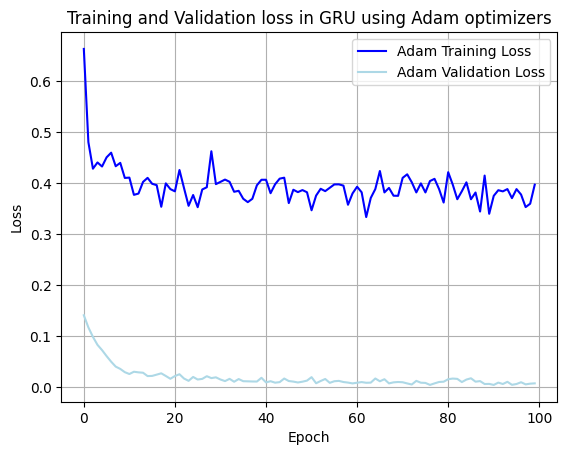

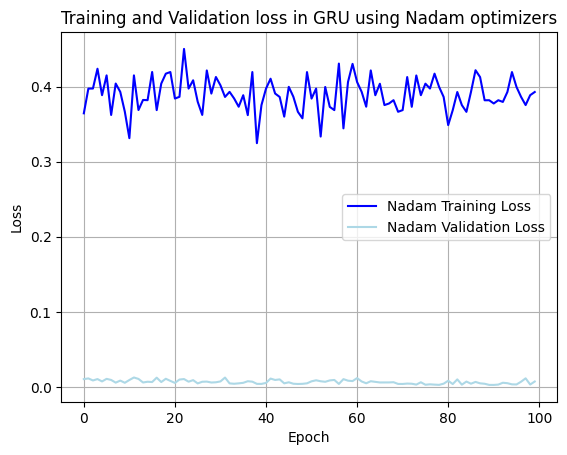

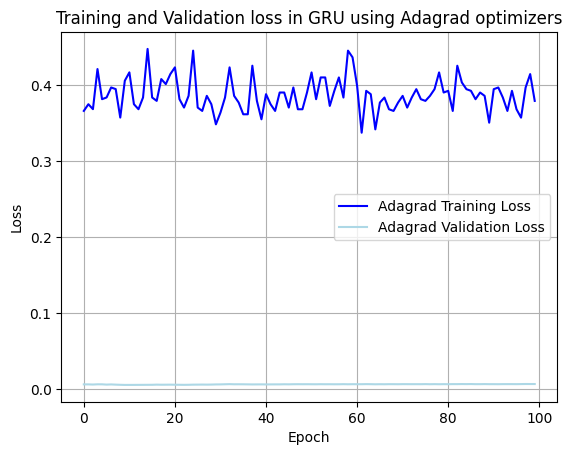

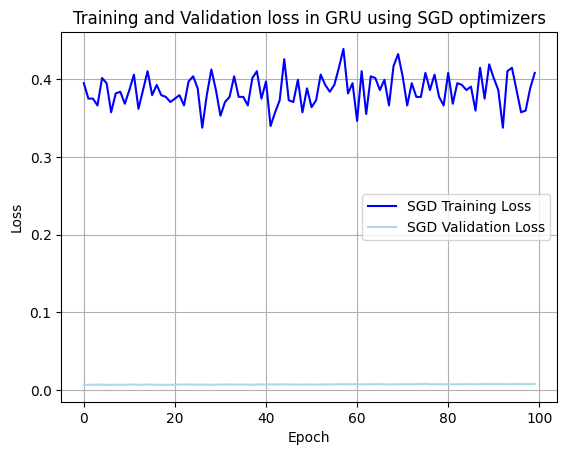

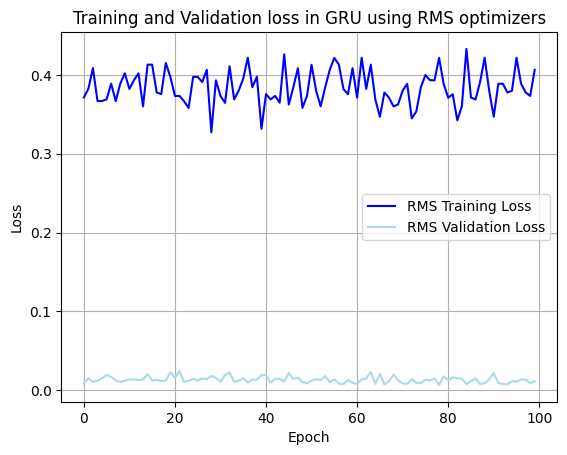

In [45]:
# ----- GRU Adam Loss -----
plt.plot(gru_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(gru_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Loss -----
plt.plot(gru_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(gru_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Loss -----
plt.plot(gru_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(gru_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Loss -----
plt.plot(gru_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(gru_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Loss -----
plt.plot(gru_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(gru_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


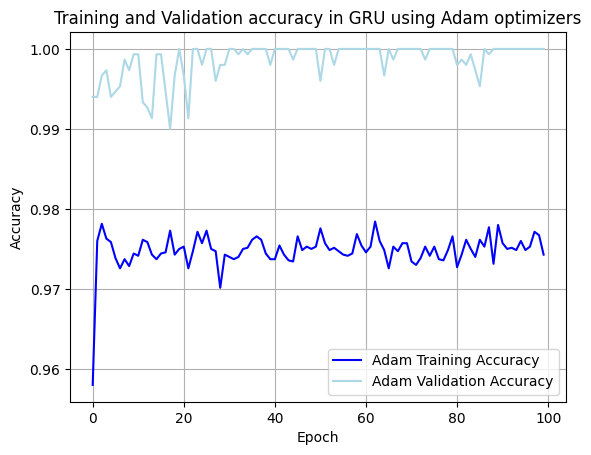

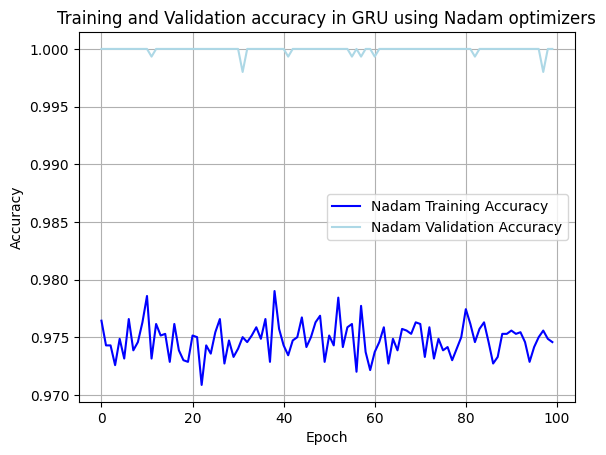

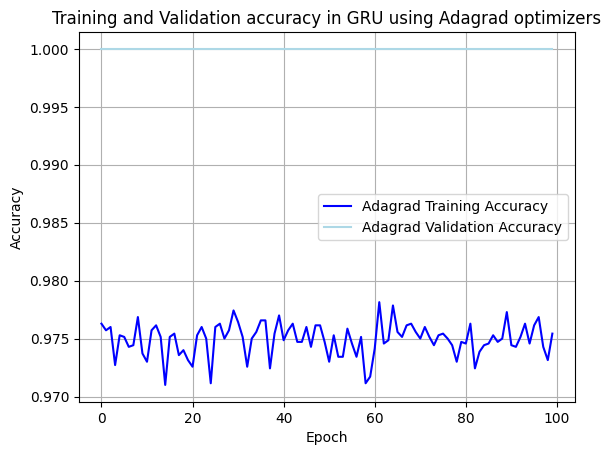

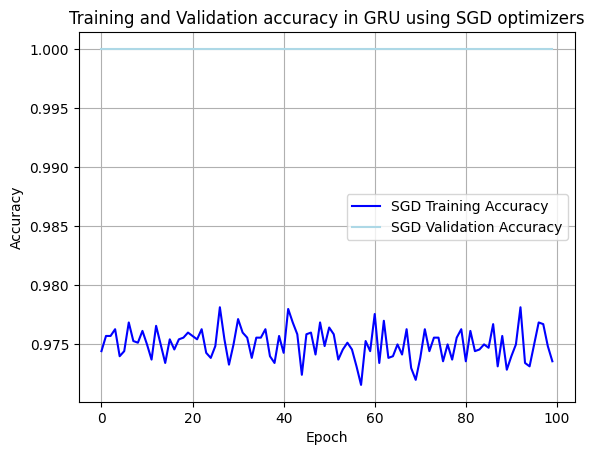

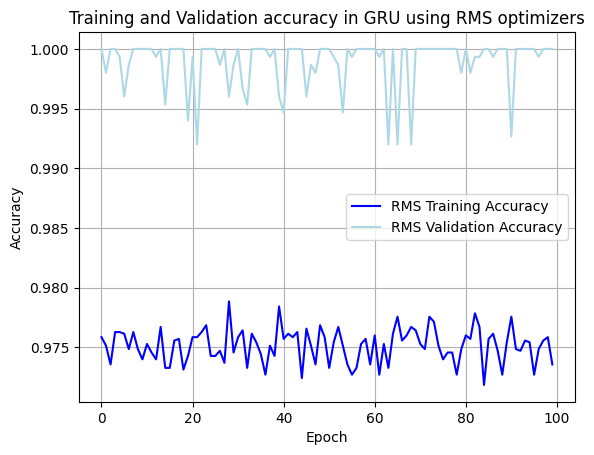

In [46]:
# ----- GRU Adam Accuracy -----
plt.plot(gru_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(gru_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Accuracy -----
plt.plot(gru_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(gru_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Accuracy -----
plt.plot(gru_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(gru_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Accuracy -----
plt.plot(gru_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(gru_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Accuracy -----
plt.plot(gru_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(gru_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


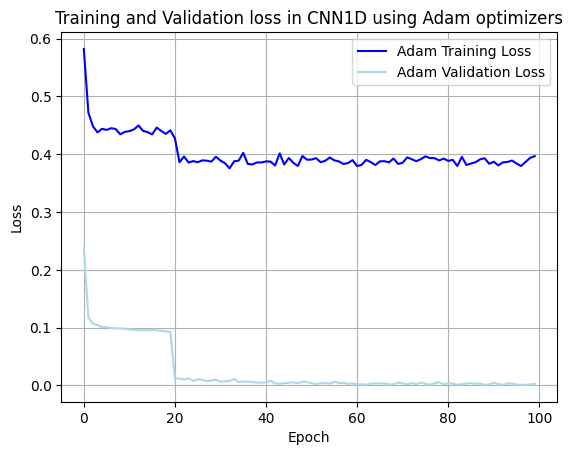

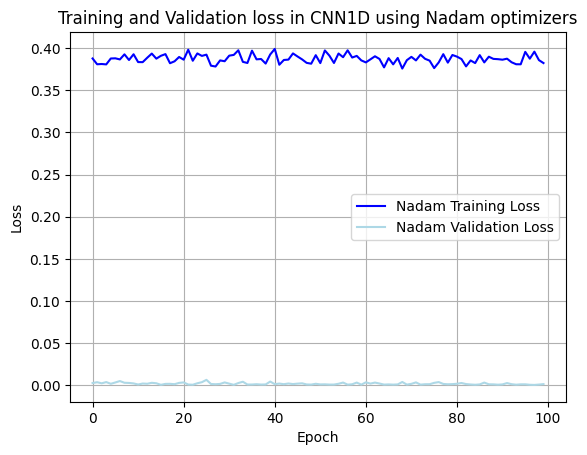

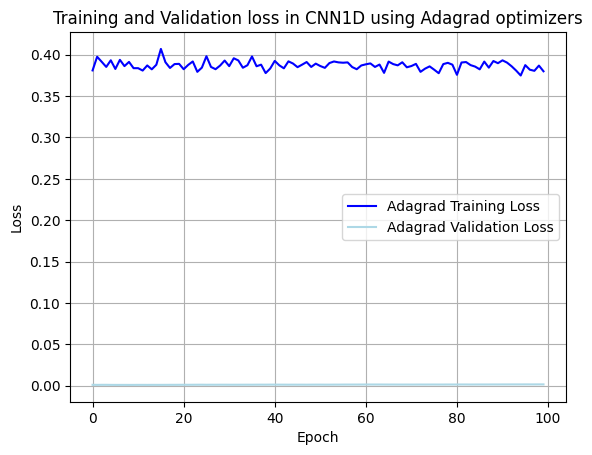

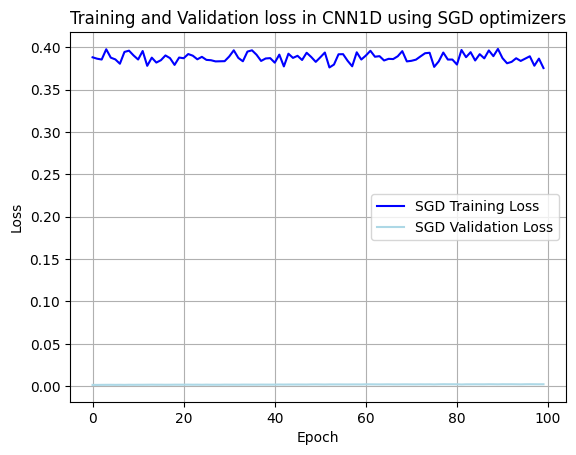

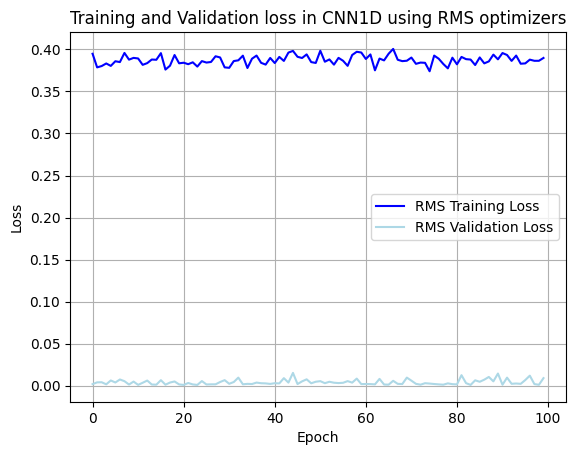

In [47]:
# ----- CNN1D Adam Loss -----
plt.plot(cnn_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(cnn_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Nadam Loss -----
plt.plot(cnn_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(cnn_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Adgrad Loss -----
plt.plot(cnn_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(cnn_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D SGD Loss -----
plt.plot(cnn_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(cnn_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D RMSProp Loss -----
plt.plot(cnn_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(cnn_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


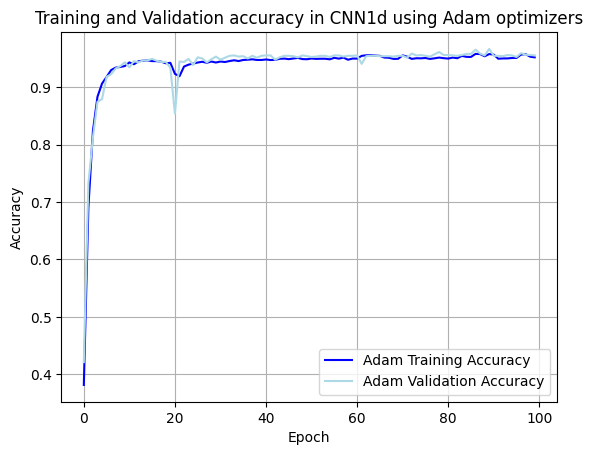

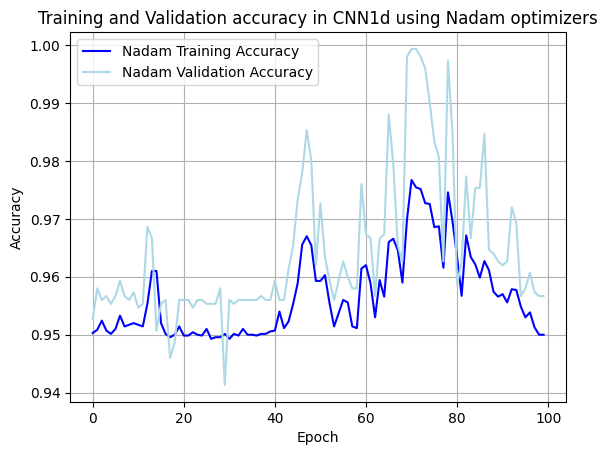

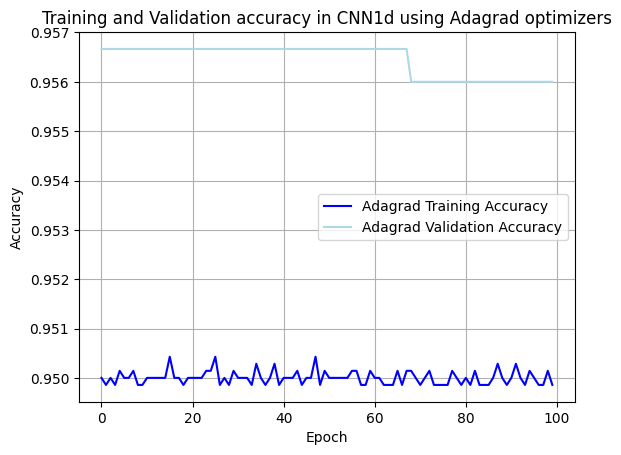

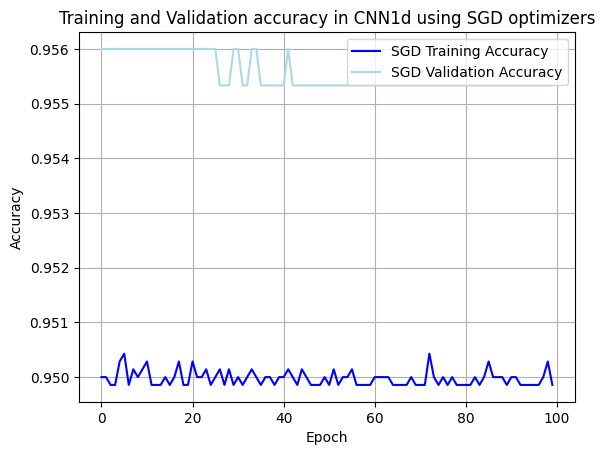

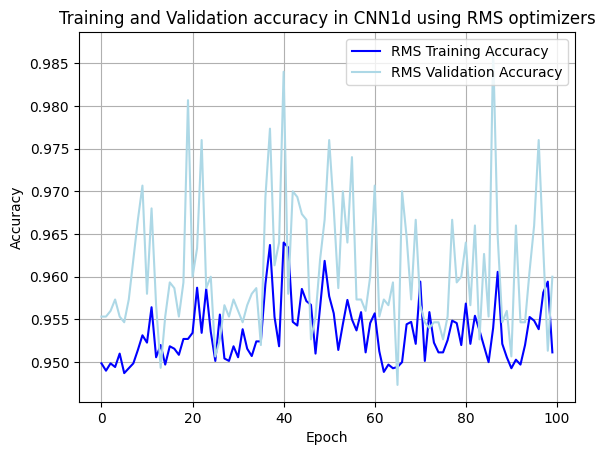

In [48]:
# ----- CNN1d Adam Accuracy -----
plt.plot(cnn_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(cnn_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Nadam Accuracy -----
plt.plot(cnn_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(cnn_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Adgrad Accuracy -----
plt.plot(cnn_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(cnn_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d SGD Accuracy -----
plt.plot(cnn_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(cnn_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d RMSProp Accuracy -----
plt.plot(cnn_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(cnn_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [50]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [51]:
models = ['LSTM', 'GRU', '1D-CNN']


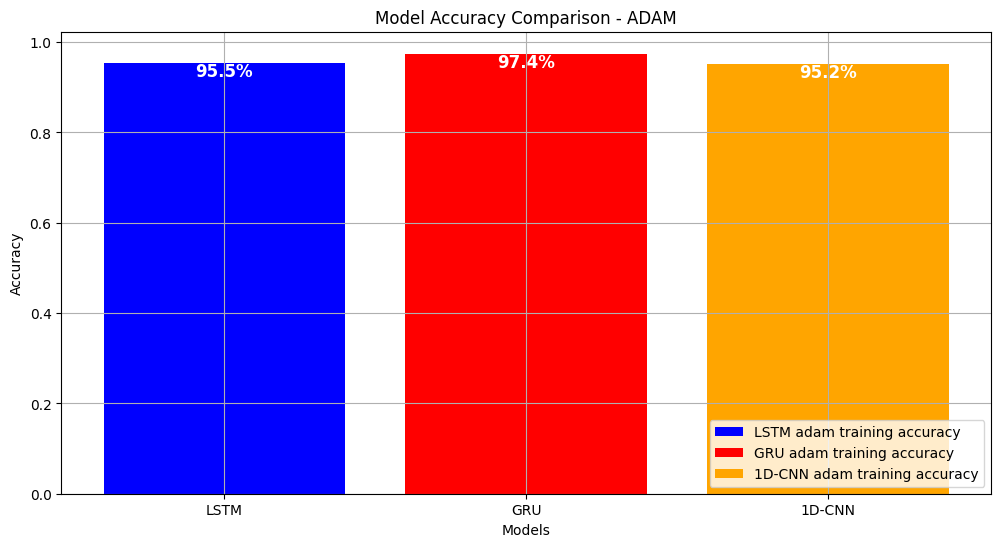

In [52]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


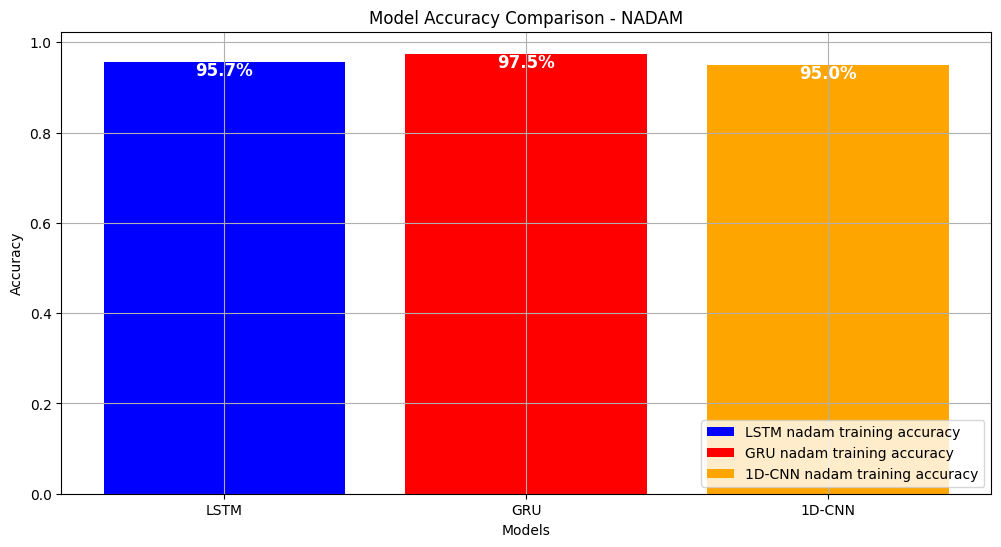

In [53]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


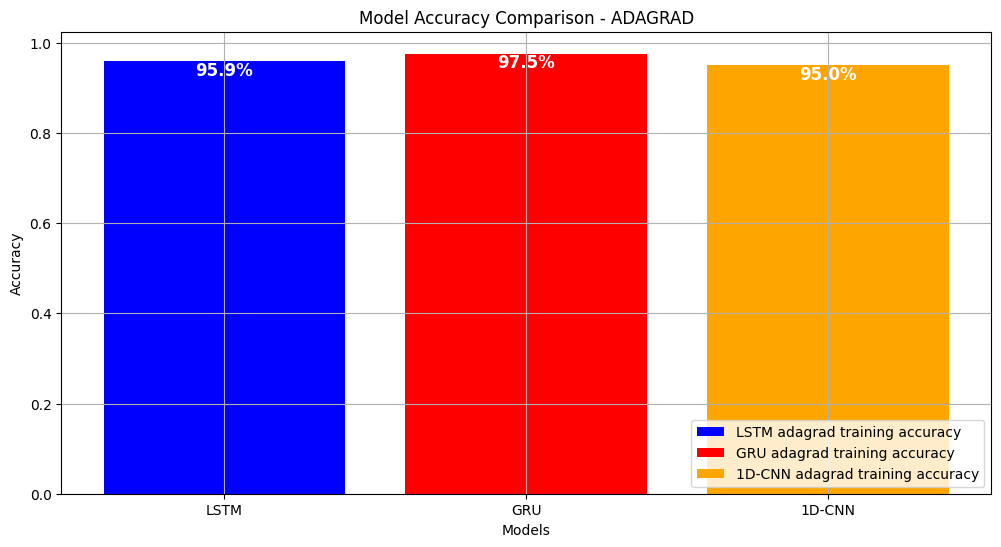

In [54]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


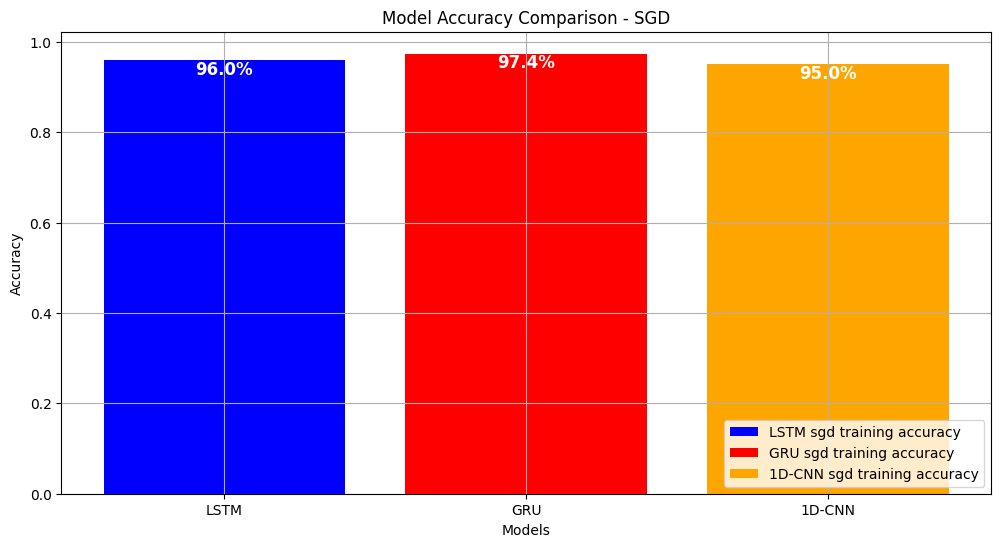

In [55]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


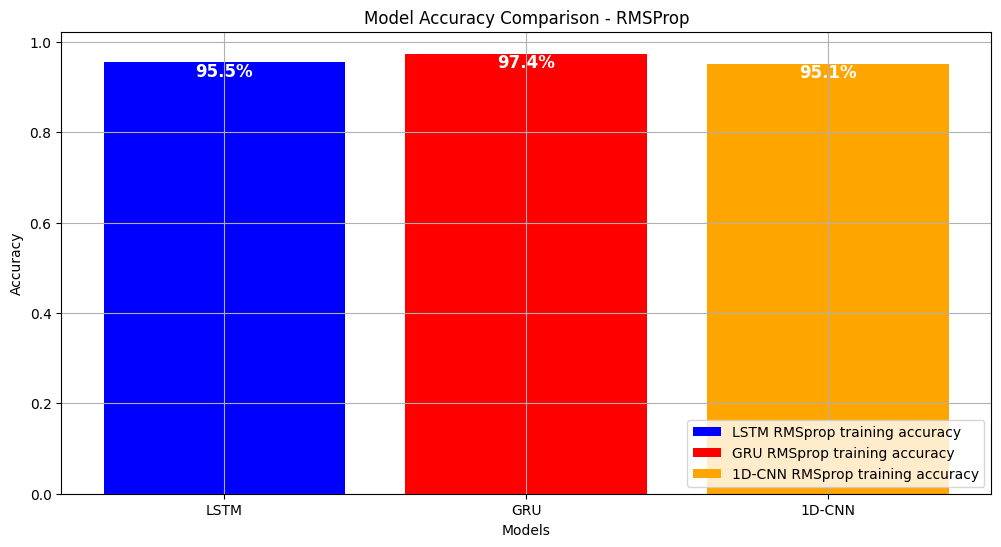

In [56]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


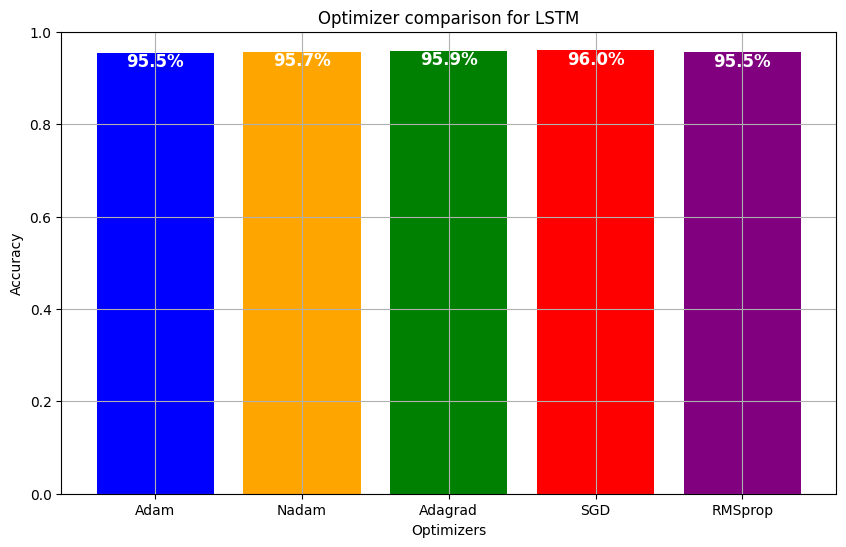

In [57]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


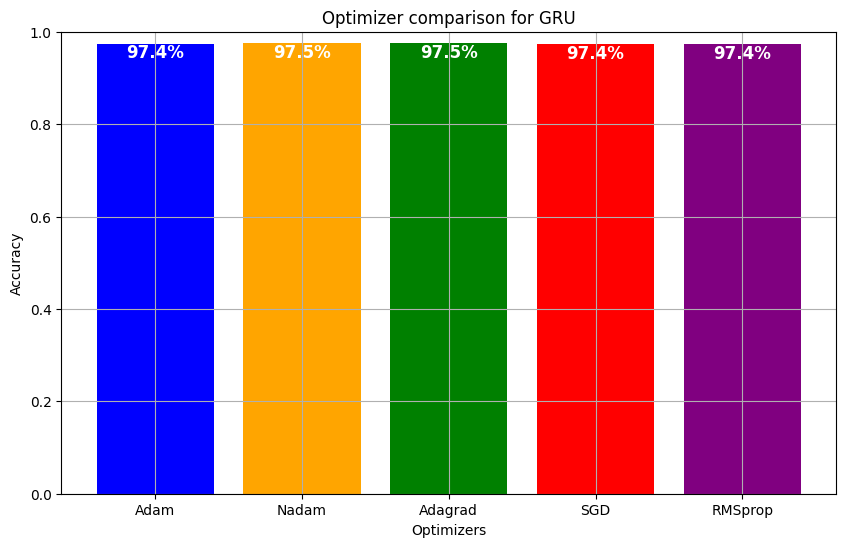

In [58]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


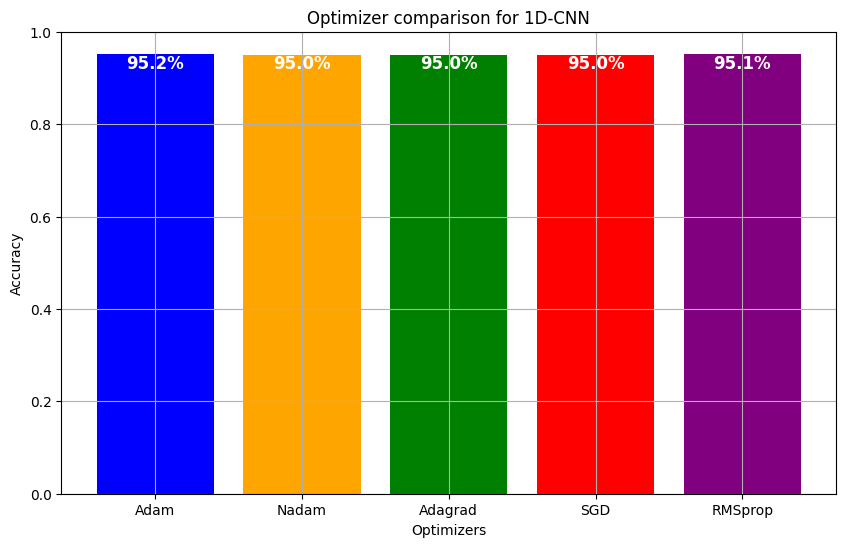

In [59]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()
